In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta, date, time
import pickle

In [5]:
df_chicago = pd.read_csv('../dataset/chicago_2018.csv') 

df_chicago["start_time"].max()

'2018-12-31 23:59:18'

In [3]:
df_chicago.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3603082 entries, 0 to 3603081
Data columns (total 8 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   start_time          object
 1   end_time            object
 2   start_station_id    int64 
 3   end_station_id      int64 
 4   start_station_name  object
 5   end_station_name    object
 6   bike_id             int64 
 7   user_type           object
dtypes: int64(3), object(5)
memory usage: 219.9+ MB


In [4]:
#Check number of rows
Lenght = len(df_chicago)
print("The dataset includes " + str(Lenght) + " entries.")

The dataset includes 3603082 entries.


In [5]:
#Check for duplicates
df_chicago[df_chicago.duplicated(keep=False)]

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type


In [6]:
#Drop duplicates and keep the last
df_chicago= df_chicago.drop_duplicates(keep='last')

In [7]:
#Check for null values
df_chicago.isnull().sum()

start_time            0
end_time              0
start_station_id      0
end_station_id        0
start_station_name    0
end_station_name      0
bike_id               0
user_type             0
dtype: int64

In [8]:
#Define conditions if start_time is smaller than end_time
conditions = [df_chicago['end_time'] < df_chicago['start_time'],
              df_chicago['start_time'] < df_chicago['end_time'],
              df_chicago['start_time'] == df_chicago['end_time']]

#Define choices
choices=["Delete","Keep", "Delete"]

#Create new column in DataFrame that displays results of comparisons
df_chicago['result'] = np.select(conditions, choices, default='Tie')

#view result
df_chicago.head(10)

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,result
0,2018-04-01 00:04:44,2018-04-01 00:13:03,22,171,May St & Taylor St,May St & Cullerton St,3819,Subscriber,Keep
1,2018-04-01 00:06:42,2018-04-01 00:27:07,157,190,Lake Shore Dr & Wellington Ave,Southport Ave & Wrightwood Ave,5000,Subscriber,Keep
2,2018-04-01 00:07:19,2018-04-01 00:23:19,106,106,State St & Pearson St,State St & Pearson St,5165,Customer,Keep
3,2018-04-01 00:07:33,2018-04-01 00:14:47,241,171,Morgan St & Polk St,May St & Cullerton St,3851,Subscriber,Keep
4,2018-04-01 00:10:23,2018-04-01 00:22:12,228,219,Damen Ave & Melrose Ave,Damen Ave & Cortland St,5065,Subscriber,Keep
5,2018-04-01 00:11:29,2018-04-01 00:22:28,244,325,Ravenswood Ave & Irving Park Rd,Clark St & Winnemac Ave (Temp),5962,Subscriber,Keep
6,2018-04-01 00:15:49,2018-04-01 00:19:47,128,130,Damen Ave & Chicago Ave,Damen Ave & Division St,4570,Subscriber,Keep
7,2018-04-01 00:17:00,2018-04-01 00:22:53,130,69,Damen Ave & Division St,Damen Ave & Pierce Ave,1323,Subscriber,Keep
8,2018-04-01 00:18:24,2018-04-01 00:23:06,130,69,Damen Ave & Division St,Damen Ave & Pierce Ave,1977,Subscriber,Keep
9,2018-04-01 00:20:00,2018-04-01 00:26:22,121,351,Blackstone Ave & Hyde Park Blvd,Cottage Grove Ave & 51st St,2602,Subscriber,Keep


In [9]:
#List of values with 'Delete' values
df_chicago.loc[df_chicago['result'] == 'Delete']

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,result
2946870,2018-11-04 01:34:41,2018-11-04 01:12:43,188,333,Greenview Ave & Fullerton Ave,Ashland Ave & Blackhawk St,2398,Subscriber,Delete
2946876,2018-11-04 01:46:45,2018-11-04 01:06:53,54,259,Ogden Ave & Chicago Ave,California Ave & Francis Pl,5303,Subscriber,Delete
2946877,2018-11-04 01:48:12,2018-11-04 01:02:46,463,229,Clark St & Berwyn Ave,Southport Ave & Roscoe St,2334,Customer,Delete
2946878,2018-11-04 01:50:42,2018-11-04 01:01:53,453,325,Clark St & Schreiber Ave,Clark St & Winnemac Ave (Temp),3109,Subscriber,Delete
2946880,2018-11-04 01:53:16,2018-11-04 01:11:13,118,152,Sedgwick St & North Ave,Lincoln Ave & Diversey Pkwy,6462,Subscriber,Delete
2946881,2018-11-04 01:55:29,2018-11-04 01:14:56,73,172,Jefferson St & Monroe St,Rush St & Cedar St,1097,Subscriber,Delete
2946882,2018-11-04 01:59:57,2018-11-04 01:27:14,497,234,Kimball Ave & Belmont Ave,Clark St & Montrose Ave,1439,Subscriber,Delete


In [10]:
#Drop outliers with the value 'Delete'
df_chicago.drop(df_chicago[df_chicago['result']== 'Delete'].index, inplace = True)


In [11]:
#Check if 'Delete' values are removed
df_chicago.loc[df_chicago['result'] == 'Delete']

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,result


In [12]:
#Check if every station_name is assigned to only one station_id and vice versa

df_id_time = df_chicago.sort_values(by=['start_time','bike_id'], ascending=True)

df_name_unique = df_id_time.groupby('start_station_name')['start_station_id'].nunique().reset_index()

df_id_unique = df_id_time.groupby('start_station_id')['start_station_name'].nunique().reset_index()

print(df_name_unique)
print(df_id_unique)

               start_station_name  start_station_id
0             2112 W Peterson Ave                 1
1                   63rd St Beach                 1
2               900 W Harrison St                 1
3      Aberdeen St & Jackson Blvd                 1
4         Aberdeen St & Monroe St                 1
..                            ...               ...
617           Wood St & Taylor St                 1
618        Woodlawn Ave & 55th St                 1
619        Woodlawn Ave & 75th St                 1
620  Woodlawn Ave & Lake Park Ave                 1
621          Yates Blvd & 75th St                 1

[622 rows x 2 columns]
     start_station_id  start_station_name
0                   2                   1
1                   3                   1
2                   4                   1
3                   5                   1
4                   6                   1
..                ...                 ...
616               660                   1
617             

In [13]:
#Check maximum number of station_ids assigned to one station_name
print(df_id_unique.start_station_name.max())

2


In [14]:
#Check maximum number of station_names assigned to one station_id
print(df_name_unique.start_station_id.max())

1


In [15]:
df_id_unique[df_id_unique.start_station_name == 2]

,start_station_id,start_station_name
222,243,2


In [16]:
df_chicago.loc[df_chicago['start_station_id'] == 243]

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,result
137,2018-04-01 07:39:42,2018-04-01 07:43:42,243,481,Lincoln Ave & Leavitt St,California Ave & Montrose Ave,6456,Subscriber,Keep
1307,2018-04-01 14:43:12,2018-04-01 14:51:21,243,234,Lincoln Ave & Leavitt St,Clark St & Montrose Ave,2688,Subscriber,Keep
2078,2018-04-01 19:11:21,2018-04-01 19:33:32,243,453,Lincoln Ave & Leavitt St,Clark St & Schreiber Ave,4847,Customer,Keep
2079,2018-04-01 19:11:36,2018-04-01 19:33:20,243,453,Lincoln Ave & Leavitt St,Clark St & Schreiber Ave,4911,Customer,Keep
2335,2018-04-01 23:06:37,2018-04-01 23:53:07,243,195,Lincoln Ave & Leavitt St,Columbus Dr & Randolph St,4384,Subscriber,Keep
...,...,...,...,...,...,...,...,...,...
3601100,2018-03-31 15:28:03,2018-03-31 15:44:42,243,229,Lincoln Ave & Leavitt St,Southport Ave & Roscoe St,6013,Subscriber,Keep
3601763,2018-03-31 16:43:11,2018-03-31 16:52:15,243,344,Lincoln Ave & Leavitt St,Ravenswood Ave & Lawrence Ave,5252,Subscriber,Keep
3601773,2018-03-31 16:44:09,2018-03-31 17:02:01,243,479,Lincoln Ave & Leavitt St,Drake Ave & Montrose Ave,6393,Subscriber,Keep
3602375,2018-03-31 18:11:36,2018-03-31 18:34:46,243,156,Lincoln Ave & Leavitt St,Clark St & Wellington Ave,5958,Subscriber,Keep


In [17]:
df_chicago.loc[df_chicago['end_station_id'] == 243]

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,result
104,2018-04-01 06:43:46,2018-04-01 07:04:09,481,243,California Ave & Montrose Ave,Lincoln Ave & Leavitt St,6456,Subscriber,Keep
776,2018-04-01 12:11:30,2018-04-01 12:24:40,131,243,Lincoln Ave & Belmont Ave,Lincoln Ave & Leavitt St,4384,Subscriber,Keep
2011,2018-04-01 18:42:29,2018-04-01 18:47:36,314,243,Ravenswood Ave & Berteau Ave,Lincoln Ave & Leavitt St,2389,Subscriber,Keep
2050,2018-04-01 18:57:37,2018-04-01 19:09:26,493,243,Western Ave & Roscoe St,Lincoln Ave & Leavitt St,4911,Customer,Keep
2053,2018-04-01 18:58:12,2018-04-01 19:09:21,493,243,Western Ave & Roscoe St,Lincoln Ave & Leavitt St,4549,Customer,Keep
...,...,...,...,...,...,...,...,...,...
3600830,2018-03-31 14:43:47,2018-03-31 14:53:17,477,243,Manor Ave & Leland Ave,Lincoln Ave & Leavitt St,4961,Subscriber,Keep
3600861,2018-03-31 14:49:36,2018-03-31 14:58:05,344,243,Ravenswood Ave & Lawrence Ave,Lincoln Ave & Leavitt St,5252,Subscriber,Keep
3601178,2018-03-31 15:36:59,2018-03-31 15:50:53,114,243,Sheffield Ave & Waveland Ave,Lincoln Ave & Leavitt St,4847,Subscriber,Keep
3601375,2018-03-31 16:00:06,2018-03-31 16:08:06,475,243,Washtenaw Ave & Lawrence Ave,Lincoln Ave & Leavitt St,5958,Subscriber,Keep


In [18]:
df_chicago[df_chicago['end_station_id']==243]['end_station_name'].unique()

array(['Lincoln Ave & Leavitt St', 'Lincoln Ave & Sunnyside Ave'],
      dtype=object)

In [19]:
df_chicago['start_station_name']=df_chicago['start_station_name'].replace('Lincoln Ave & Leavitt St','Lincoln Ave & Sunnyside Ave')

In [20]:
df_chicago['end_station_name']=df_chicago['end_station_name'].replace('Lincoln Ave & Leavitt St','Lincoln Ave & Sunnyside Ave')

In [21]:
df_chicago[df_chicago['end_station_id']==243]['end_station_name'].unique()

array(['Lincoln Ave & Sunnyside Ave'], dtype=object)

In [22]:
#Check if every station_name is assigned to only one station_id and vice versa

df_id_time = df_chicago.sort_values(by=['start_time','bike_id'], ascending=True)

df_name_unique = df_id_time.groupby('start_station_name')['start_station_id'].nunique().reset_index()

df_id_unique = df_id_time.groupby('start_station_id')['start_station_name'].nunique().reset_index()

print(df_name_unique)
print(df_id_unique)

               start_station_name  start_station_id
0             2112 W Peterson Ave                 1
1                   63rd St Beach                 1
2               900 W Harrison St                 1
3      Aberdeen St & Jackson Blvd                 1
4         Aberdeen St & Monroe St                 1
..                            ...               ...
616           Wood St & Taylor St                 1
617        Woodlawn Ave & 55th St                 1
618        Woodlawn Ave & 75th St                 1
619  Woodlawn Ave & Lake Park Ave                 1
620          Yates Blvd & 75th St                 1

[621 rows x 2 columns]
     start_station_id  start_station_name
0                   2                   1
1                   3                   1
2                   4                   1
3                   5                   1
4                   6                   1
..                ...                 ...
616               660                   1
617             

In [23]:
df_id_unique[df_id_unique.start_station_name == 2]

,start_station_id,start_station_name


In [24]:
#Format the columns from datatype object to datatype datetime
df_chicago['start_time'] = pd.to_datetime(df_chicago['start_time'])
df_chicago['end_time'] = pd.to_datetime(df_chicago['end_time'])

In [25]:
#Calculate the duration time of each trip
df_chicago['duration_per_trip'] = df_chicago['end_time'] - df_chicago['start_time']

In [26]:
#Calculate total trip time in hours
df_chicago = df_chicago.assign(trip_time_in_hours=df_chicago.apply(lambda x: x['end_time'] - x['start_time'], axis=1) / pd.Timedelta(hours=1)
)

In [27]:
df_chicago.head(10)

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,result,duration_per_trip,trip_time_in_hours
0,2018-04-01 00:04:44,2018-04-01 00:13:03,22,171,May St & Taylor St,May St & Cullerton St,3819,Subscriber,Keep,0 days 00:08:19,0.138611
1,2018-04-01 00:06:42,2018-04-01 00:27:07,157,190,Lake Shore Dr & Wellington Ave,Southport Ave & Wrightwood Ave,5000,Subscriber,Keep,0 days 00:20:25,0.340278
2,2018-04-01 00:07:19,2018-04-01 00:23:19,106,106,State St & Pearson St,State St & Pearson St,5165,Customer,Keep,0 days 00:16:00,0.266667
3,2018-04-01 00:07:33,2018-04-01 00:14:47,241,171,Morgan St & Polk St,May St & Cullerton St,3851,Subscriber,Keep,0 days 00:07:14,0.120556
4,2018-04-01 00:10:23,2018-04-01 00:22:12,228,219,Damen Ave & Melrose Ave,Damen Ave & Cortland St,5065,Subscriber,Keep,0 days 00:11:49,0.196944
5,2018-04-01 00:11:29,2018-04-01 00:22:28,244,325,Ravenswood Ave & Irving Park Rd,Clark St & Winnemac Ave (Temp),5962,Subscriber,Keep,0 days 00:10:59,0.183056
6,2018-04-01 00:15:49,2018-04-01 00:19:47,128,130,Damen Ave & Chicago Ave,Damen Ave & Division St,4570,Subscriber,Keep,0 days 00:03:58,0.066111
7,2018-04-01 00:17:00,2018-04-01 00:22:53,130,69,Damen Ave & Division St,Damen Ave & Pierce Ave,1323,Subscriber,Keep,0 days 00:05:53,0.098056
8,2018-04-01 00:18:24,2018-04-01 00:23:06,130,69,Damen Ave & Division St,Damen Ave & Pierce Ave,1977,Subscriber,Keep,0 days 00:04:42,0.078333
9,2018-04-01 00:20:00,2018-04-01 00:26:22,121,351,Blackstone Ave & Hyde Park Blvd,Cottage Grove Ave & 51st St,2602,Subscriber,Keep,0 days 00:06:22,0.106111


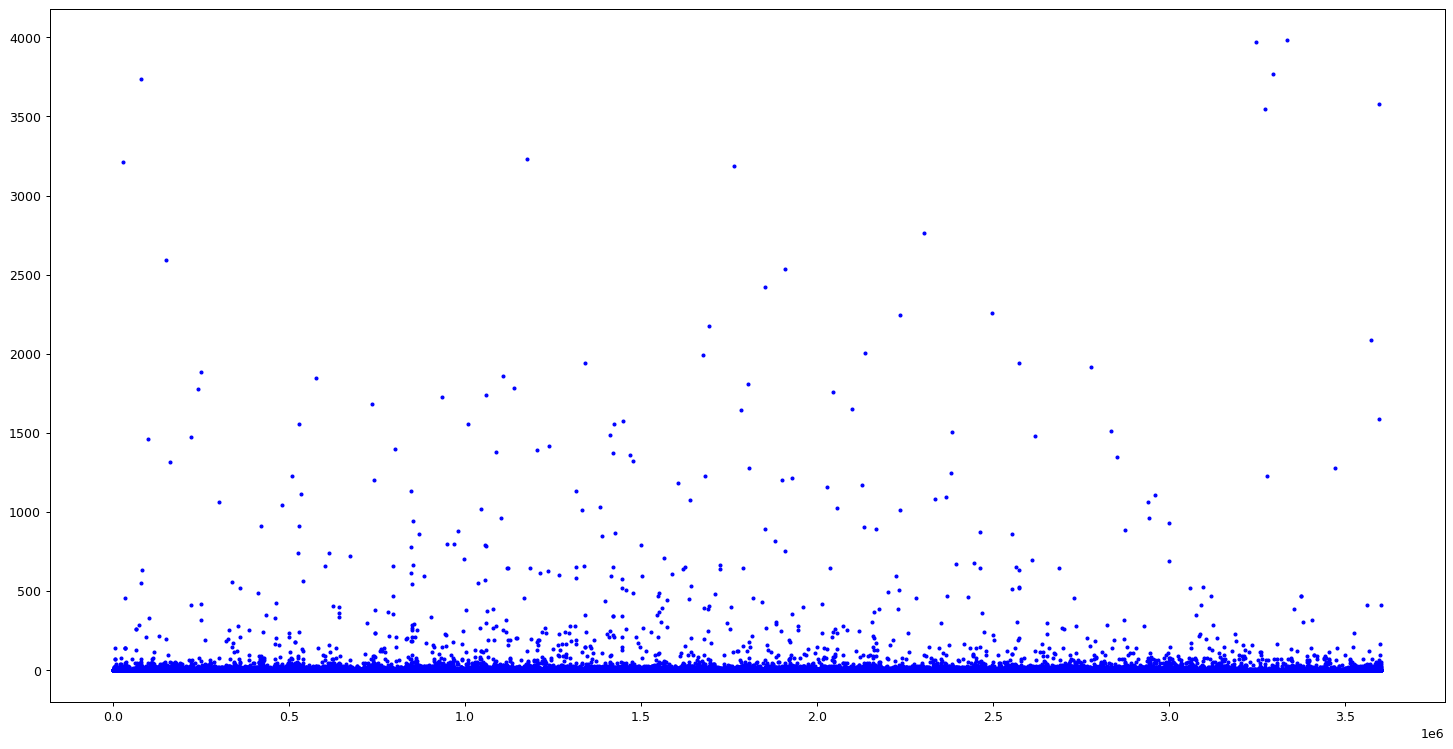

In [28]:
#Trip duration plot 
fig,ax = plt.subplots(figsize=(20,10), dpi= 90) 

label_font = {'labelsize':'10'}
axis_font = {'size':'35'}
dic={'fontsize': '25'}

ax.scatter(df_chicago.index, df_chicago['trip_time_in_hours'], s = 5, c = 'blue')

plt.show()

In [29]:
#Calculate 0.99 quantile
df_chicago['trip_time_in_hours'].quantile(0.99)
x = df_chicago['trip_time_in_hours'].quantile(0.99)


In [30]:
df_chicago.loc[df_chicago['trip_time_in_hours'] < x]

df_chicago_quantile = df_chicago.loc[df_chicago['trip_time_in_hours'] < x]

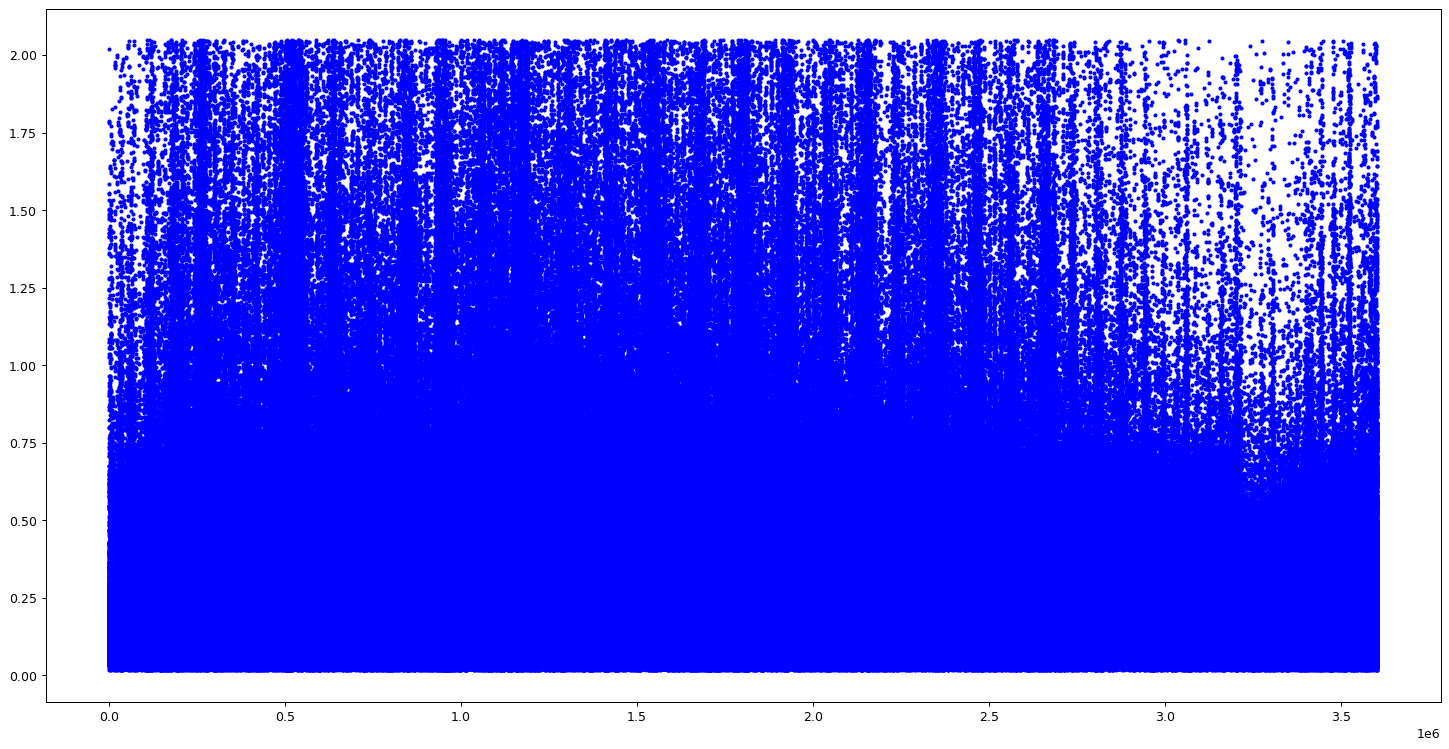

In [31]:
#Trip duration plot 
fig,ax = plt.subplots(figsize=(20,10), dpi= 90) 

label_font = {'labelsize':'10'}
axis_font = {'size':'35'}
dic={'fontsize': '25'}

ax.scatter(df_chicago_quantile.index, df_chicago_quantile['trip_time_in_hours'], s = 5, c = 'blue')

plt.show()

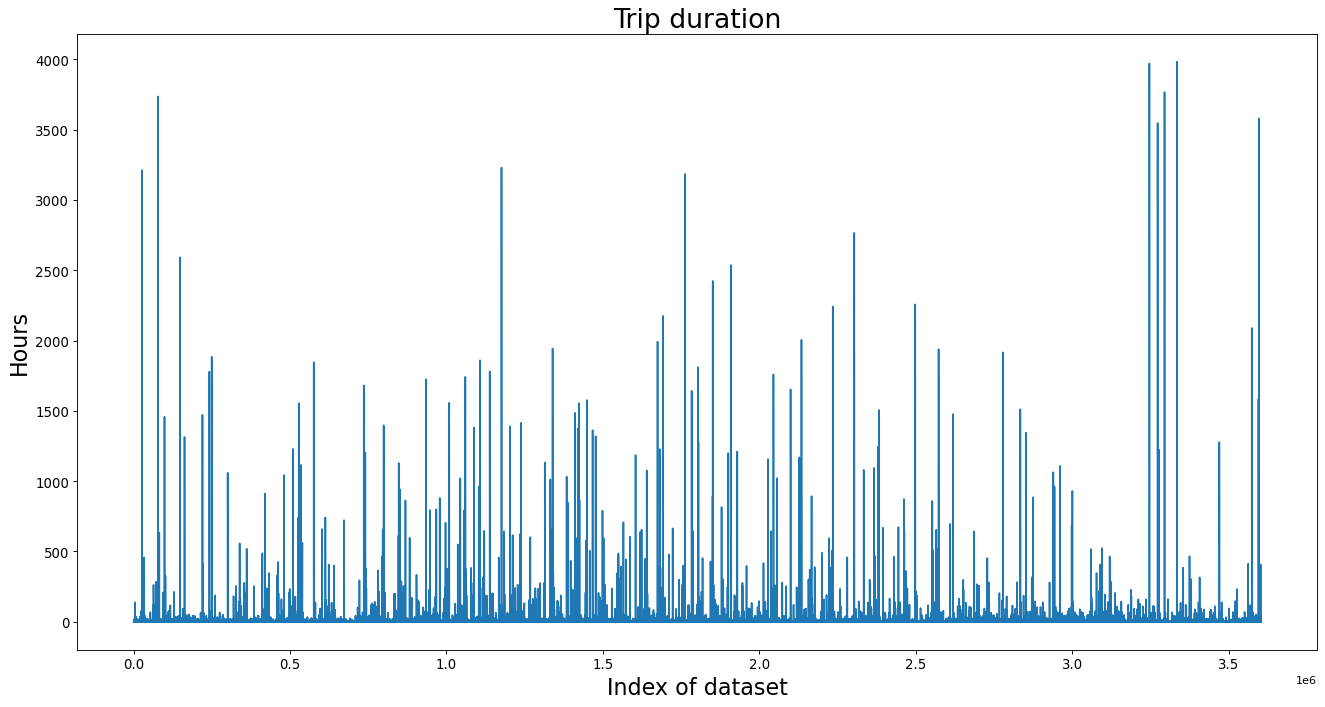

In [32]:
#plot trip duration
fig,ax = plt.subplots(figsize=(20,10), dpi= 80) 
axis_font = {'size':'20'}
label_font = {'labelsize':'12'}
dic={'fontsize': '24'}

ax.plot(df_chicago['trip_time_in_hours'], color = 'tab:blue')
ax.set_title("Trip duration", dic)
ax.set_ylabel('Hours',**axis_font)
ax.set_xlabel('Index of dataset',**axis_font)
ax.tick_params(axis='both', **label_font)
plt.show()

In [33]:
print(len(df_chicago))
print(len(df_chicago_quantile))

3603075
3567025


In [34]:
df_chicago = df_chicago_quantile

In [35]:
df_chicago.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3567025 entries, 0 to 3603081
Data columns (total 11 columns):
 #   Column              Dtype          
---  ------              -----          
 0   start_time          datetime64[ns] 
 1   end_time            datetime64[ns] 
 2   start_station_id    int64          
 3   end_station_id      int64          
 4   start_station_name  object         
 5   end_station_name    object         
 6   bike_id             int64          
 7   user_type           object         
 8   result              object         
 9   duration_per_trip   timedelta64[ns]
 10  trip_time_in_hours  float64        
dtypes: datetime64[ns](2), float64(1), int64(3), object(4), timedelta64[ns](1)
memory usage: 326.6+ MB


In [36]:
#Check trip length to exclude potential outliers
df_chicago.sort_values(by=["duration_per_trip"], ascending=False).head(10)

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,result,duration_per_trip,trip_time_in_hours
1291725,2018-07-14 15:54:28,2018-07-14 17:57:22,341,6,Adler Planetarium,Dusable Harbor,589,Customer,Keep,0 days 02:02:54,2.048333
1807750,2018-08-12 11:47:27,2018-08-12 13:50:21,127,35,Lincoln Ave & Fullerton Ave,Streeter Dr & Grand Ave,2866,Customer,Keep,0 days 02:02:54,2.048333
1017507,2018-06-28 14:41:08,2018-06-28 16:44:02,211,211,St. Clair St & Erie St,St. Clair St & Erie St,5032,Customer,Keep,0 days 02:02:54,2.048333
842017,2018-06-16 15:18:13,2018-06-16 17:21:07,76,172,Lake Shore Dr & Monroe St,Rush St & Cedar St,4350,Customer,Keep,0 days 02:02:54,2.048333
936412,2018-06-23 16:38:12,2018-06-23 18:41:06,53,53,Wells St & Huron St,Wells St & Huron St,699,Customer,Keep,0 days 02:02:54,2.048333
1735503,2018-08-08 15:31:38,2018-08-08 17:34:32,157,44,Lake Shore Dr & Wellington Ave,State St & Randolph St,1191,Customer,Keep,0 days 02:02:54,2.048333
1794875,2018-08-11 15:29:24,2018-08-11 17:32:18,43,195,Michigan Ave & Washington St,Columbus Dr & Randolph St,180,Customer,Keep,0 days 02:02:54,2.048333
827670,2018-06-15 17:58:42,2018-06-15 20:01:36,76,268,Lake Shore Dr & Monroe St,Lake Shore Dr & North Blvd,5186,Customer,Keep,0 days 02:02:54,2.048333
638861,2018-06-03 15:03:29,2018-06-03 17:06:23,150,150,Fort Dearborn Dr & 31st St,Fort Dearborn Dr & 31st St,285,Customer,Keep,0 days 02:02:54,2.048333
944237,2018-06-24 08:16:35,2018-06-24 10:19:29,35,35,Streeter Dr & Grand Ave,Streeter Dr & Grand Ave,5120,Customer,Keep,0 days 02:02:54,2.048333


In [37]:
df_chicago.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3567025 entries, 0 to 3603081
Data columns (total 11 columns):
 #   Column              Dtype          
---  ------              -----          
 0   start_time          datetime64[ns] 
 1   end_time            datetime64[ns] 
 2   start_station_id    int64          
 3   end_station_id      int64          
 4   start_station_name  object         
 5   end_station_name    object         
 6   bike_id             int64          
 7   user_type           object         
 8   result              object         
 9   duration_per_trip   timedelta64[ns]
 10  trip_time_in_hours  float64        
dtypes: datetime64[ns](2), float64(1), int64(3), object(4), timedelta64[ns](1)
memory usage: 326.6+ MB


In [38]:
#Drop rows who started or ended biketrip before and after 2018 
df_chicago.drop(df_chicago[df_chicago['start_time'] < '2018-01-01 00:00:00'].index, inplace = True)
df_chicago.drop(df_chicago[df_chicago['end_time'] > '2018-12-31 23:59:59'].index, inplace = True)

In [39]:
df_chicago['duration_per_trip'].describe()

count                      3567022
mean     0 days 00:16:13.007353473
std      0 days 00:16:12.308773189
min                0 days 00:01:01
25%                0 days 00:06:32
50%                0 days 00:11:06
75%                0 days 00:19:45
max                0 days 02:02:54
Name: duration_per_trip, dtype: object

In [40]:
#Check if for every bike_id only one ride is happening at the same time

df_bike_id = df_chicago.sort_values(by=['bike_id','start_time'], ascending=True)
x_chicago = df_bike_id[['start_time','end_time', 'bike_id']]

#Add columns next_ride and next_bike 
x_chicago = x_chicago.assign(next_bike_id=0)
x_chicago['next_bike']= x_chicago['bike_id'].shift(periods=-1)
x_chicago = x_chicago.assign(next_ride_start=0)
x_chicago['next_ride']= x_chicago['start_time'].shift(periods=-1)


#Compare if next trip is with the same bike
x_chicago['compare_id'] = x_chicago.apply(lambda x: True if ((x['bike_id'] == x['next_bike'])) else False, axis=1)

#Drop last row because of nan
x_chicago = x_chicago.dropna() 

x_chicago['check'] = x_chicago.apply(lambda x: True if ((x['next_ride'] >= x['end_time'])) else False, axis=1)

#Find wrong entrys 
df_trips_at_same_time = x_chicago[(x_chicago['check']==False)&(x_chicago['compare_id']==True)]

print('Wrong entrys: '+str(len(df_trips_at_same_time)))

Wrong entrys: 1


In [41]:
#Display wrong entries
print('Entrys before this drop: ' + str(len(df_chicago)))
same_time = list(df_trips_at_same_time.index)
same_time
print(same_time)

Entrys before this drop: 3567022
[1369725]


In [42]:
#Drop wrong entries
df_chicago = df_chicago.drop(same_time)

In [43]:
print('Entrys after this drop: ' + str(len(df_chicago)))

Entrys after this drop: 3567021


In [44]:
df_chicago.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3567021 entries, 0 to 3603081
Data columns (total 11 columns):
 #   Column              Dtype          
---  ------              -----          
 0   start_time          datetime64[ns] 
 1   end_time            datetime64[ns] 
 2   start_station_id    int64          
 3   end_station_id      int64          
 4   start_station_name  object         
 5   end_station_name    object         
 6   bike_id             int64          
 7   user_type           object         
 8   result              object         
 9   duration_per_trip   timedelta64[ns]
 10  trip_time_in_hours  float64        
dtypes: datetime64[ns](2), float64(1), int64(3), object(4), timedelta64[ns](1)
memory usage: 326.6+ MB


In [45]:
#Export dataset
df_chicago.to_csv(r'../dataset/chicago_2018.csv', index = False)

In [46]:
#Pickle write
outfile = open(r'../dataset/chicago_2018.pickle','wb')
pickle.dump(df_chicago,outfile)
outfile.close()